In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import statsmodels


from IPython.display import HTML
%matplotlib inline

pd.options.display.precision = 15
pd.options.display.max_rows = 500

import warnings
warnings.filterwarnings("ignore")

# from bs4 import BeautifulSoup
# import requests
import time, random
import datetime
import re
import gensim
from gensim.models import CoherenceModel

## 1. Analysing data from Linked In

In [ ]:
#read in data
df = pd.read_excel('/combined and filtered - data science.xlsx') #, encoding='cp1252'

#print first few rows
print(df.shape)
df.head()

(1688, 8)


,Unnamed: 0,job_title,company_name,company_location,work_time,post_date,Description,work_method
0,0,Commodity Business Intelligence ...,NEOM,"Neom, Tabuk, Saudi Arabia ...",NaN,5 days ago,About the jobSummaryWe are looking for a Busin...,NaN
1,1,Data Intelligence Manager ...,Almosafer,"Riyadh, Saudi Arabia ...",NaN,1 week ago,About the jobWe are seeking a skilled and expe...,NaN
2,2,Data Manager,Salt,"Riyadh, Saudi Arabia ...",NaN,1 week ago,About the jobMy client are a pioneering global...,NaN
3,3,Merchandise Planning Analyst (20...,Nahdi Medical Co. ...,"Jeddah, Makkah, Saudi Arabia ...",NaN,1 week ago,About the jobJob DescriptionThe Merchandise Pl...,NaN
4,4,Business Analyst,Solutions by 42 ...,"Dammam, Eastern, Saudi Arabia ...",NaN,2 days ago,About the jobJob Purpose:Business analysis is ...,NaN


### Clear the Datar Frame from the Un wanted Job

Create a copy of the data

In [ ]:
df_clean = df
len(df_clean)

1688

Remove Dublicate

In [ ]:
df_clean = df_clean.drop_duplicates(subset =['job_title', 'Description']).reset_index(drop=True)
len(df_clean)

1062

Handle Missing Data

In [ ]:
#Replace missing values so reg expressions can be used for contract and salary
df_clean = df_clean.fillna('-')

Remove space from the Company name and job Title column

In [ ]:
df_clean['job_title'] = df_clean['job_title'].str.replace(" ", "")

#### Data Scince selection

In [ ]:
df_clean['job_title'] = df_clean['job_title'].str.lower()
print("Number of roles containing 'Data':",  df_clean[df_clean['job_title'].str.contains("data")|df_clean['job_title'].str.contains("intelligence")].shape[0])

Number of roles containing 'Data': 157


Create Date Frame for the Data Job

In [ ]:
data_df = df_clean[df_clean['job_title'].str.contains("data")|df_clean['job_title'].str.contains("intelligence")]
print("Size of the 'Data Job:", len(data_df))
data_df=data_df.applymap(str)

Size of the 'Data Job: 157


Un selected Job from the data frame

In [ ]:
print("Number of Titles not containing 'Data':",  df[~df['job_title'].str.contains("Data")|~df['job_title'].str.contains("DATA")].shape[0])
# df[~df['job_title'].str.contains("Data")]

Number of Titles not containing 'Data': 1688


In [ ]:
df = data_df
len(df)

157

### Job Title

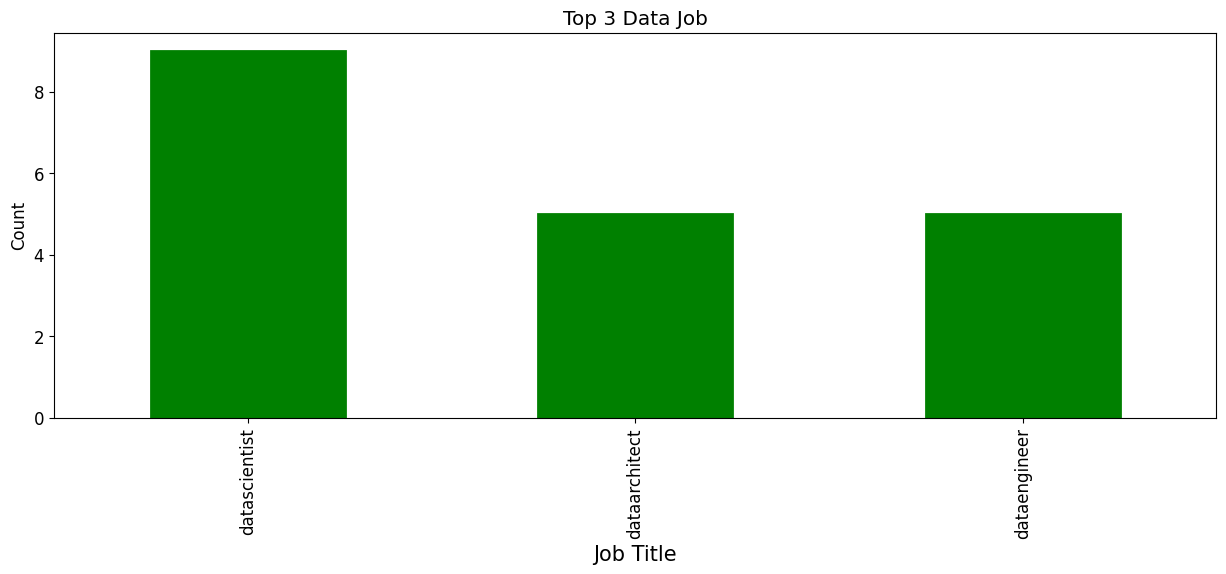

In [ ]:
plt.figure(figsize = (15,5))
data_top = data_df["job_title"].value_counts().sort_values(ascending=False).head(3)
data_top
data_top.plot.bar(color= "green", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("Top 3 Data Job")
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count")
plt.show()

### Location Mining

In [ ]:
!pip install geopandas #Google Colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    confl

In [ ]:
!pip install plotly_express #Google Colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/reso

In [ ]:
import geopandas as gpd
import plotly_express as px

In [ ]:
map = gpd.read_file("/bin/sau_places/SAU_Places_ESRI.shp")
map['NAME'] = map['NAME'].replace('[^a-zA-Z]', '', regex=True).str.lower()
map

,NAME,LANG,ADMIN1,ISLANDNAME,COUNTRY,CNTRY_FIPS,CNTRY_ISO,TYPE,CLASS,POPEST,LONGITUDE,LATITUDE,RENDITION,ID,FID_1,geometry
0,almuwassam,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.820380999999998,16.417249999999999,5,151152,5148896,POINT (42.82038 16.41725)
1,mathan,0,Jizan,NaN,Saudi Arabia,SA,SA,100,6,-1,42.930000000000000,16.430000000000000,6,751258,5741866,POINT (42.93000 16.43000)
2,mijannah,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.966647999999999,16.529630999999998,5,151145,5148889,POINT (42.96665 16.52963)
3,baisari,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.791161000000002,16.534268999999998,5,151144,5148888,POINT (42.79116 16.53427)
4,huthrur,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.867859000000003,16.547670000000000,5,151143,5148887,POINT (42.86786 16.54767)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,alwashwash,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.616667000000000,31.383333000000000,6,300992,5294883,POINT (37.61667 31.38333)
1645,kaf,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,4,-1,37.495578999999999,31.390190000000000,4,172929,5170420,POINT (37.49558 31.39019)
1646,alhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,5,-1,37.148139999999998,31.456011000000000,5,172924,5170415,POINT (37.14814 31.45601)
1647,mujammaalhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.109999999999999,31.510000000000002,6,751454,5742062,POINT (37.11000 31.51000)


Create a copy of Data Frame to check location field

In [ ]:
df_loc = df

In [ ]:
df_loc["company_location"] = df_loc["company_location"].str.replace('\n', '')
df_loc['company_location_list'] = df_loc['company_location'].str.split(',')
df_loc['company_location_list'] = df_loc['company_location_list'].apply(lambda x: [s.strip() for s in x])
df_loc['company_location_list'] = df_loc['company_location_list'].apply(lambda x: [item for item in x if item != 'Saudi Arabia'])
df_loc['company_location_list'] = df_loc['company_location_list'].apply(lambda x: list(set(x)))
df_loc['company_location_list'] = df_loc['company_location_list'].apply(lambda x: [s.lower() for s in x])

In [ ]:
map['Job Count']=0
map

,NAME,LANG,ADMIN1,ISLANDNAME,COUNTRY,CNTRY_FIPS,CNTRY_ISO,TYPE,CLASS,POPEST,LONGITUDE,LATITUDE,RENDITION,ID,FID_1,geometry,Job Count
0,almuwassam,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.820380999999998,16.417249999999999,5,151152,5148896,POINT (42.82038 16.41725),0
1,mathan,0,Jizan,NaN,Saudi Arabia,SA,SA,100,6,-1,42.930000000000000,16.430000000000000,6,751258,5741866,POINT (42.93000 16.43000),0
2,mijannah,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.966647999999999,16.529630999999998,5,151145,5148889,POINT (42.96665 16.52963),0
3,baisari,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.791161000000002,16.534268999999998,5,151144,5148888,POINT (42.79116 16.53427),0
4,huthrur,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.867859000000003,16.547670000000000,5,151143,5148887,POINT (42.86786 16.54767),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,alwashwash,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.616667000000000,31.383333000000000,6,300992,5294883,POINT (37.61667 31.38333),0
1645,kaf,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,4,-1,37.495578999999999,31.390190000000000,4,172929,5170420,POINT (37.49558 31.39019),0
1646,alhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,5,-1,37.148139999999998,31.456011000000000,5,172924,5170415,POINT (37.14814 31.45601),0
1647,mujammaalhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.109999999999999,31.510000000000002,6,751454,5742062,POINT (37.11000 31.51000),0


In [ ]:
index =0
for city in map['NAME']:
    count = df_loc['company_location_list'].apply(lambda x: x.count(city)).sum()
    map['Job Count'][index]= count
    index+=1
map

,NAME,LANG,ADMIN1,ISLANDNAME,COUNTRY,CNTRY_FIPS,CNTRY_ISO,TYPE,CLASS,POPEST,LONGITUDE,LATITUDE,RENDITION,ID,FID_1,geometry,Job Count
0,almuwassam,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.820380999999998,16.417249999999999,5,151152,5148896,POINT (42.82038 16.41725),0
1,mathan,0,Jizan,NaN,Saudi Arabia,SA,SA,100,6,-1,42.930000000000000,16.430000000000000,6,751258,5741866,POINT (42.93000 16.43000),0
2,mijannah,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.966647999999999,16.529630999999998,5,151145,5148889,POINT (42.96665 16.52963),0
3,baisari,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.791161000000002,16.534268999999998,5,151144,5148888,POINT (42.79116 16.53427),0
4,huthrur,0,Jizan,NaN,Saudi Arabia,SA,SA,100,5,-1,42.867859000000003,16.547670000000000,5,151143,5148887,POINT (42.86786 16.54767),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,alwashwash,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.616667000000000,31.383333000000000,6,300992,5294883,POINT (37.61667 31.38333),0
1645,kaf,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,4,-1,37.495578999999999,31.390190000000000,4,172929,5170420,POINT (37.49558 31.39019),0
1646,alhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,5,-1,37.148139999999998,31.456011000000000,5,172924,5170415,POINT (37.14814 31.45601),0
1647,mujammaalhadithah,0,Tabuk,NaN,Saudi Arabia,SA,SA,100,6,-1,37.109999999999999,31.510000000000002,6,751454,5742062,POINT (37.11000 31.51000),0


In [ ]:
df_filtered = map[map['Job Count'] != 0] #to only plot those not zero
# df_filtered

In [ ]:
fig = px.scatter_mapbox(df_filtered, lat='LATITUDE', lon='LONGITUDE', color="Job Count", size="Job Count",
                        center=dict(lat=map.LATITUDE.mean(),
                                    lon=map.LONGITUDE.mean()),
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=4,
                  mapbox_style="carto-positron",
                                          size_max=50)
fig.show()

### Date Post Mining

Create a copy of the Data frame

In [ ]:
df_Date = df

In [ ]:
df_Date["post_date"] = df_Date["post_date"].astype('string')
df_Date["post_date"] = df_Date["post_date"].str.replace('\n', '')
df_Date['post_date_list'] = df_Date['post_date'].str.split()
# df_Date['post_date_list'] = df_Date['post_date'].apply(lambda x: [item for item in x if item != 'ago'])
df_Date['post_date_day']=''
df_Date['post_date_list'].head()

0     [5, days, ago]
1     [1, week, ago]
2     [1, week, ago]
16    [1, week, ago]
17    [1, week, ago]
Name: post_date_list, dtype: object

In [ ]:
start_date = datetime.datetime.today() - datetime.timedelta(days=1)


In [ ]:
time = ['hour', 'day', 'week', 'month']
index=0
for job in df_Date['post_date_list']:
    for n in range(len(time)):
        pattern = r'({}|{})'.format(time[n], time[n] + 's')
        match = re.search(pattern, job[1])
        if match and time[n]=='hour':
            h = (datetime.datetime.today() - datetime.timedelta(days=4)) - datetime.timedelta(hours=int(job[0]))
            df_Date['post_date_day'][index] =str(h.strftime('%A'))
        elif match and time[n]=='day':
            d = (datetime.datetime.today() - datetime.timedelta(days=4)) - datetime.timedelta(days=int(job[0]))
            df_Date['post_date_day'][index] = str(d.strftime('%A'))
        elif match and time[n]=='week':
            w = (datetime.datetime.today() - datetime.timedelta(days=4)) - datetime.timedelta(days=(int(job[0])*7))
            df_Date['post_date_day'][index] = str(w.strftime('%A'))
        elif match and time[n]=='month':
            m = (datetime.datetime.today() - datetime.timedelta(days=4)) - datetime.timedelta(days=(int(job[0])*30))
            df_Date['post_date_day'][index] = str(m.strftime('%A'))
    index+=1
df_Date['post_date_day'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



             109
Monday        30
Thursday       6
Saturday       5
Wednesday      3
Sunday         3
Friday         1
Name: post_date_day, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



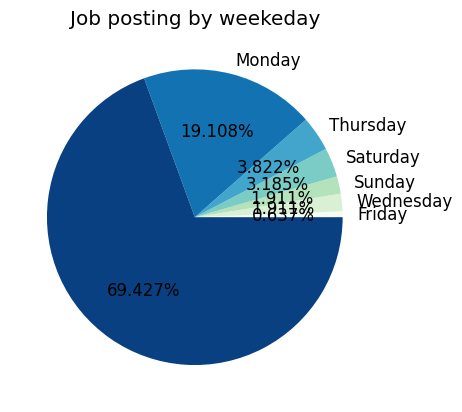

In [ ]:
df_Date['post_date_day'].value_counts().sort_values().plot(kind='pie', autopct='%.3f%%', cmap='GnBu').set(xlabel='', ylabel='', title='Job posting by weekeday')
plt.show()

### companies post

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

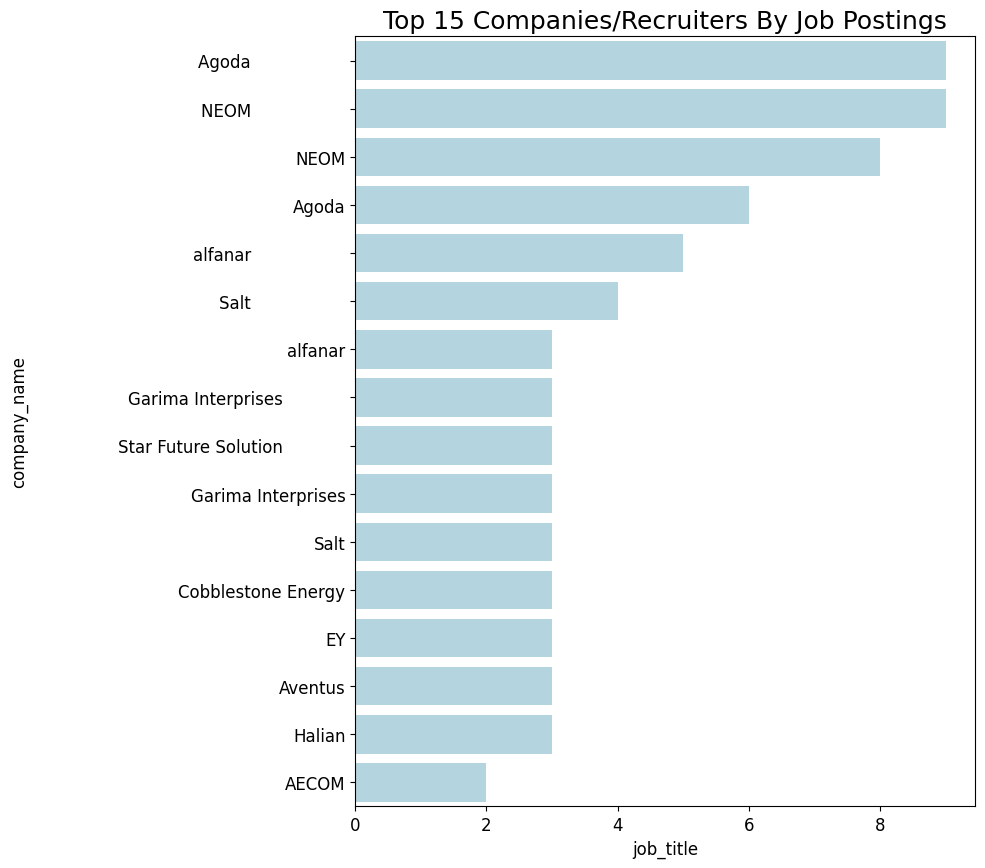

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

#Dataset relating to recruiters
rec_df = df.groupby('company_name').count().sort_values(by='job_title', ascending=False).reset_index()[['company_name', 'job_title']].copy()

# Plot the total crashes
sns.set_color_codes("bright")
sns.barplot(x="job_title", y="company_name", data=rec_df.loc[0:15,:],
            label="Total", color="lightblue")

plt.title('Top 15 Companies/Recruiters By Job Postings', fontsize=18);

Unsurprisingly most of the frequently positing companies are recruiters. Although in greater London it seems Harnham and Datatech Analytics have the largest number of roles. It may be worth speaking directly with these 2 to understand more about the roles they contain. Out of interest Harnham have managed to find a different title for every role they've posted. 42 of their 59 roles contain some form of 'Data Scientist' and to not use the same titles feeds nicely into the next section.

In [ ]:
list(df[(df['job_title'].str.contains('data')|df_clean['job_title'].str.contains("intelligence"))  & (df['company_name']=='Agoda')]['job_title'].values)

['dataanalyst(bangkokbased,relocationprovided)',
 'seniordataanalyst(bangkokbased,relocationprovided)',
 'seniorpeopledataanalyst(bangkokbased,relocationprovided)',
 'seniorbusinessintelligenceanalyst(bangkokbased,relocationprovided)',
 'senior-staffdataengineer–apachespark(java/scala)(bangkokbased,relocationprovided)',
 'senior-staffdataengineer–apachespark(java/scala)(bangkokbased,relocationprovided)']

### Contract Type

Another important aspect to look into for a job search is whether the role is permanent or contract. Not all adverts on indeed specify this but will look into the split of permanent, contract, missing.

In [ ]:
df['work_time'].head()

0     -
1     -
2     -
16    -
17    -
Name: work_time, dtype: object

In [ ]:
df3 = df.work_time.str.split('·', expand = True)
df3.columns = ['worktime{}'.format(x+1) for x in df3.columns]
df3.head()

,worktime1,worktime2
0,-,None
1,-,None
2,-,None
16,-,None
17,-,None


In [ ]:
df['Contract'] = df3.worktime1
df['level'] = df3.worktime2

In [ ]:
# Contract# array = df.work_time.str.split('·')
# df[['Contract', 'level']] = df.work_time.str.split('·', expand = True)
# df.head()

In [ ]:
print('Roles with a contract type specified:', round(df[df['Contract']!='-'].groupby('Contract')['job_title'].count().sum()/len(df),2)*100, '%')
df.groupby('Contract')['job_title'].count().reset_index()

Roles with a contract type specified: 79.0 %


,Contract,job_title
0,-,33
1,Contract,6
2,Full-time,11
3,Full-time,102
4,Internship,4
5,Part-time,1


41% of roles have a type of contract associated with them. It may be possible to further investigate the ones without a contract type and find out from their description. For now an assumption shall be made that these are permanent. There are roles with only a count of 1 that contain a number of different contract types. I will class the contracts as the following:

- Contract: Anything that has 'contract' or 'temporary' associated with it
- Apprenticeship
- Internship
- Permanent: Any contract that is classed as 'Full-time' or 'Permanent'

In [ ]:
#Function to return the contract type
def contract_type(x):
    if re.search('Contract', x):
        return 'Contract'
    if re.search('Temporary', x):
        return 'Contract'
    if re.search('Full-time', x):
        return 'Permanent'
    if re.search('Permanent', x):
        return 'Permanent'
    if re.search('Internship', x):
        return 'Internship'
    else:
        return x

df['Contract_Type'] = df['Contract'].apply(contract_type)
df.groupby('Contract_Type')['job_title'].count().reset_index()


,Contract_Type,job_title
0,-,33
1,Contract,6
2,Internship,4
3,Part-time,1
4,Permanent,113


Remove noisy data

In [ ]:
#Remove 10,001+ employees
# df = df[(df['Contract_Type']!='10,001+ employees') & (df['Contract_Type']!='10,001+ employees')]

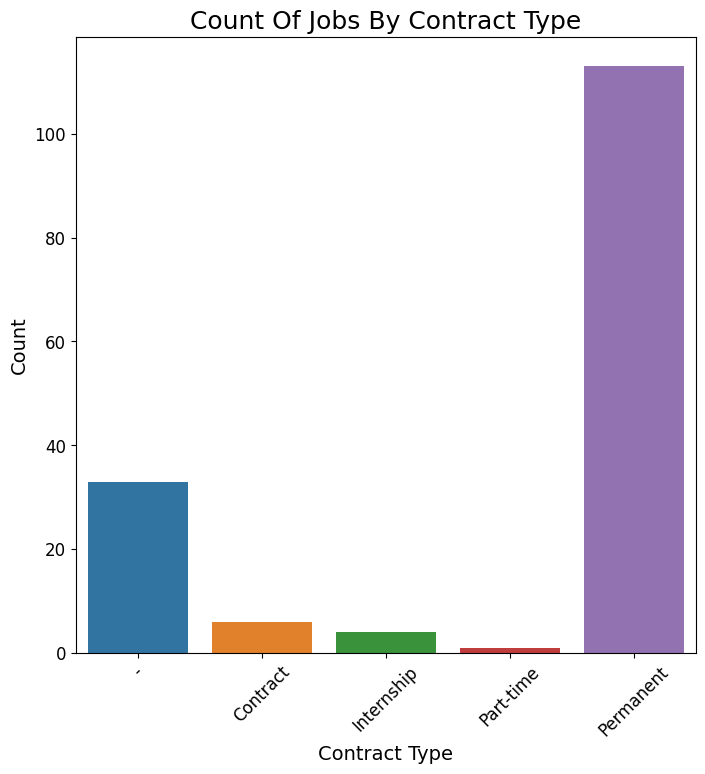

In [ ]:
contract_df = df.groupby('Contract_Type').count().reset_index()[['Contract_Type', 'job_title']]

f, ax = plt.subplots(figsize=(8,8))
plt.xticks(rotation=45)

sns.barplot(x='Contract_Type', y='job_title', data=contract_df)

ax.set_title('Count Of Jobs By Contract Type', fontsize=18)
ax.set_xlabel('Contract Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14);

### Job Level Type

In [ ]:
print('Roles with a contract type specified:', round(df[df['level']!='-'].groupby('level')['job_title'].count().sum()/len(df),2)*100, '%')
df.groupby('level')['job_title'].count().reset_index()

Roles with a contract type specified: 69.0 %


,level,job_title
0,Associate,16
1,Director,4
2,Entry level,24
3,Executive,1
4,Internship,2
5,Mid-Senior level,61


In [ ]:
# remove noisy data

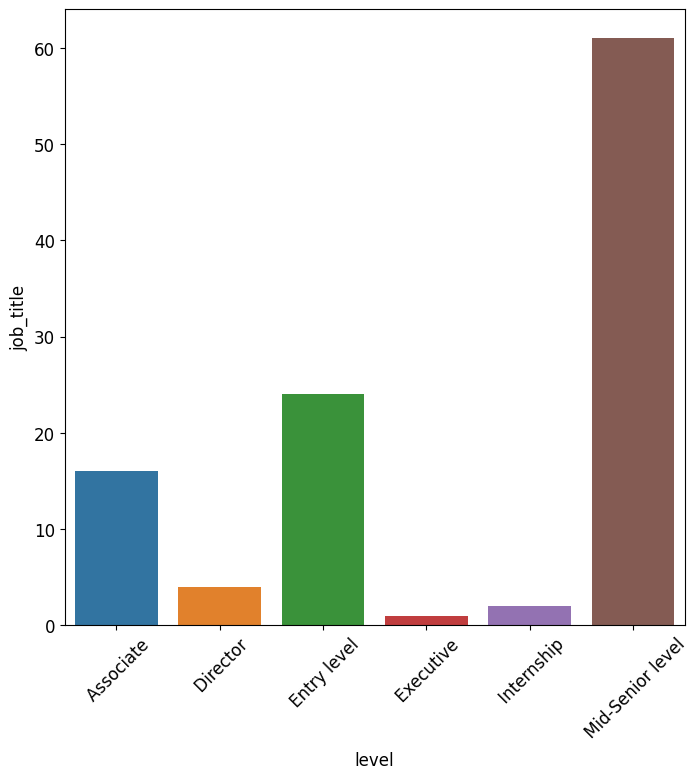

In [ ]:
contract_df = df.groupby('level').count().reset_index()[['level', 'job_title']]

f, ax = plt.subplots(figsize=(8,8))
plt.xticks(rotation=45)

sns.barplot(x='level', y='job_title', data=contract_df)

# show plot
plt.show()
ax.set_title('Count Of Jobs By level Type', fontsize=18)
ax.set_xlabel('Job Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14);

### Job Descriabtion

Word Cloud

In [ ]:
pg_lan_sf = ["python","c++","java","matlab",".net","c#","javascript","html","bash","swift","php", " r "]
pg_lan = ["python","c++","java","javascript","html","bash"]
big_data = ["big data","hadoop","spark","impala","cassandra","kafka","hive"]
exp_edu = ["phd","master","bachelor"]
cloud =["aws","gcp","azure","s3","redshift"]
ds_ml = ["machine learning","regression","stat","numpy","pandas","data visualization","data analysis","time series","data cleaning","deep learning"]
other_skills = ["sql","excel","sas","communication"]
job = df["Description"].tolist()

In [ ]:
job = [x.lower() for x in job]

In [ ]:
from collections import defaultdict

#### Programming Language

In [ ]:
pg_lan_required = defaultdict()
for item in pg_lan:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    pg_lan_required[item] = counter

pg_lan_df = pd.DataFrame(list(pg_lan_required.items()),columns = ['Programming Langauge','count'])
pg_lan_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

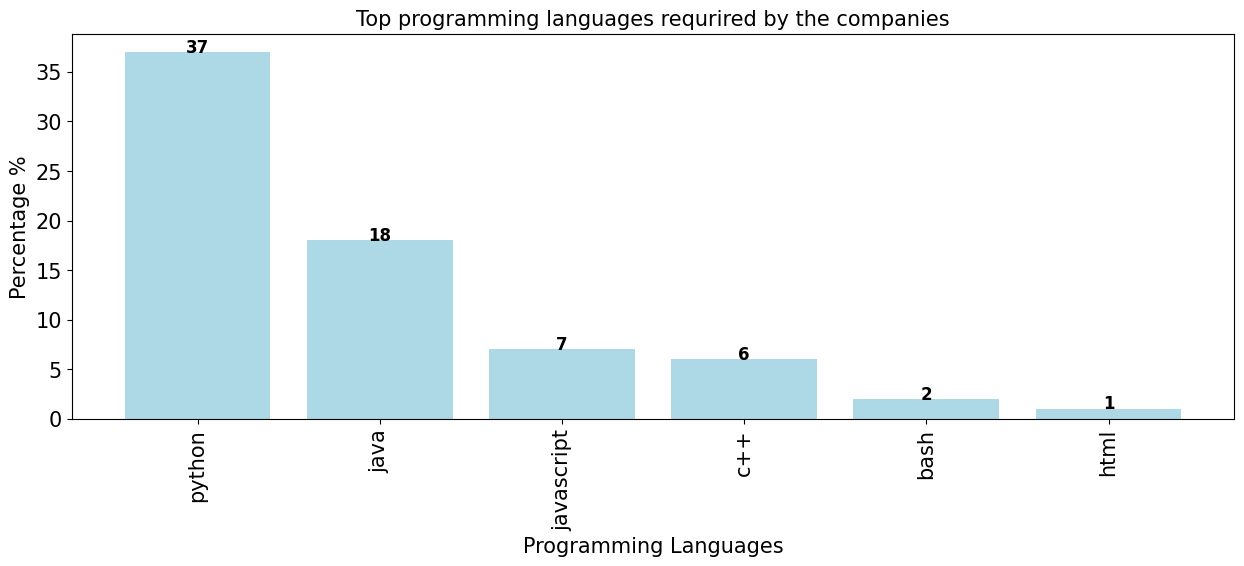

In [ ]:
plt.figure(figsize = (15,5))
x = pg_lan_df["Programming Langauge"]
y = pg_lan_df["count"]
plt.bar(x,y,color= "lightblue")
plt.title("Top programming languages requrired by the companies",fontsize=15)
plt.xlabel("Programming Languages",fontsize=15)
plt.ylabel("Percentage %",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in pg_lan_required.items():
    plt.text(k,v+0, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

#### Big Data Technologies

In [ ]:
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    big_data_required[item] = counter

big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','count'])
big_data_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

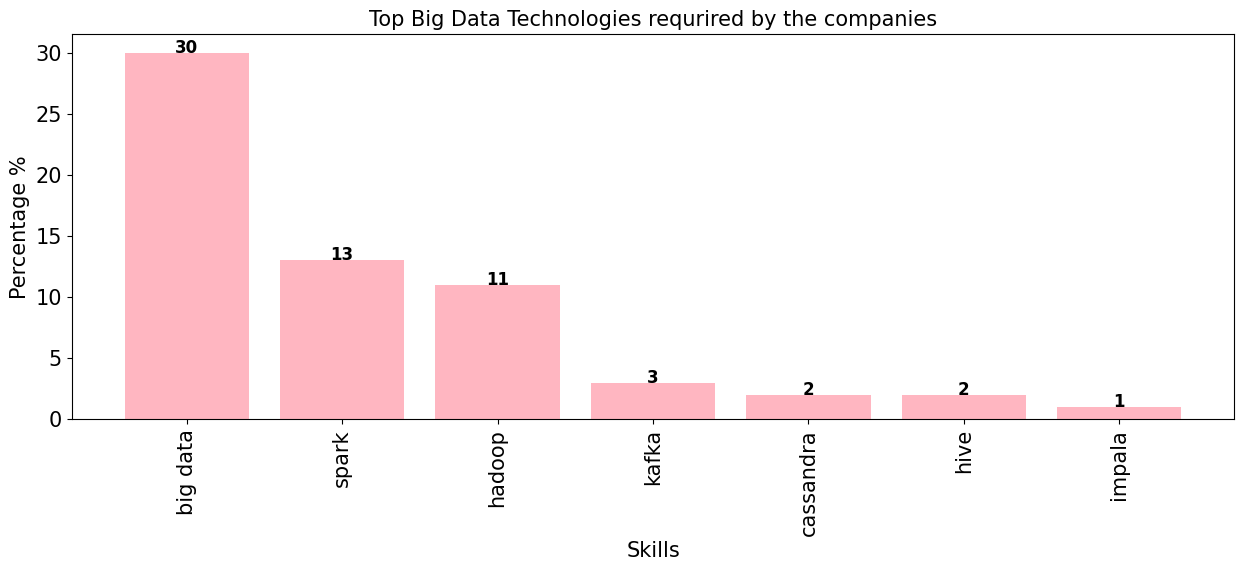

In [ ]:
plt.figure(figsize = (15,5))
x = big_data_df["Big Data Technologies"]
y = big_data_df["count"]
plt.bar(x,y,color= "lightpink")
plt.title("Top Big Data Technologies requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Percentage %",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in big_data_required.items():
    plt.text(k,v+0, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

#### Education level

In [ ]:
import math

In [ ]:
exp_edu_required = defaultdict()
for item in exp_edu:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    exp_edu_required[item] = counter # math.ceil((counter/len(job)  *100))

exp_edu_df = pd.DataFrame(list(exp_edu_required.items()),columns = ['Education','Percentage'])
exp_edu_df.sort_values(["Percentage"], axis=0, ascending=False, inplace=True)

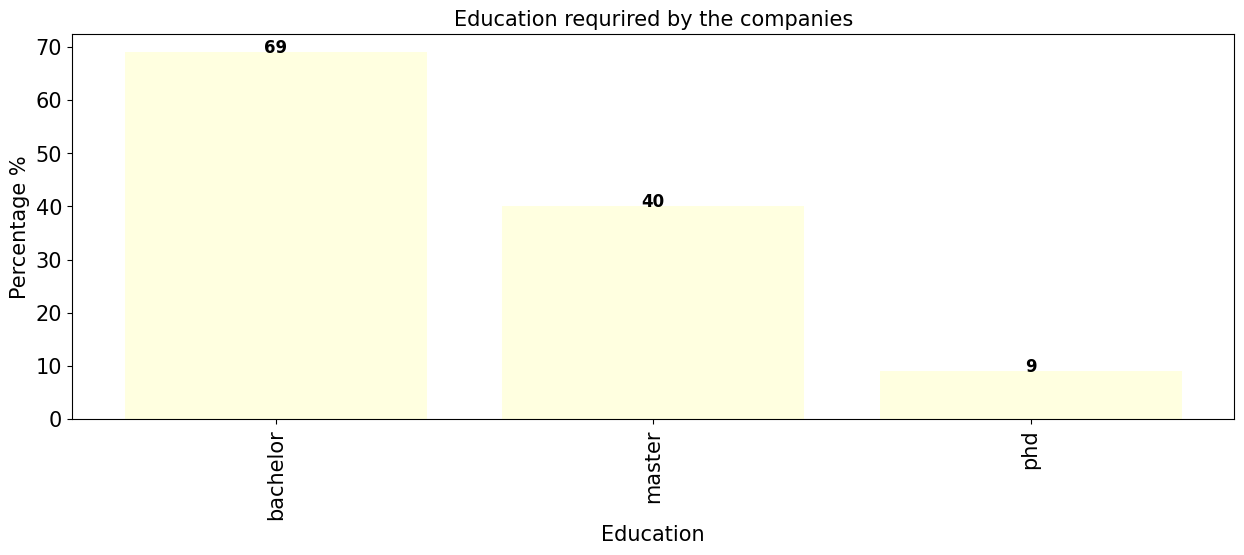

In [ ]:
plt.figure(figsize = (15,5))
x = exp_edu_df["Education"]
y = exp_edu_df["Percentage"]
plt.bar(x,y,color= "lightyellow")
plt.title("Education requrired by the companies",fontsize=15)
plt.xlabel("Education",fontsize=15)
plt.ylabel("Percentage %",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in exp_edu_required.items():
    plt.text(k,v+0, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

#### Cloud Computing

In [ ]:
counter = 0
cloud_required = defaultdict()
for item in cloud:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    cloud_required[item] = counter



cloud_df = pd.DataFrame(list(cloud_required.items()),columns = ['cloud ','count'])
cloud_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

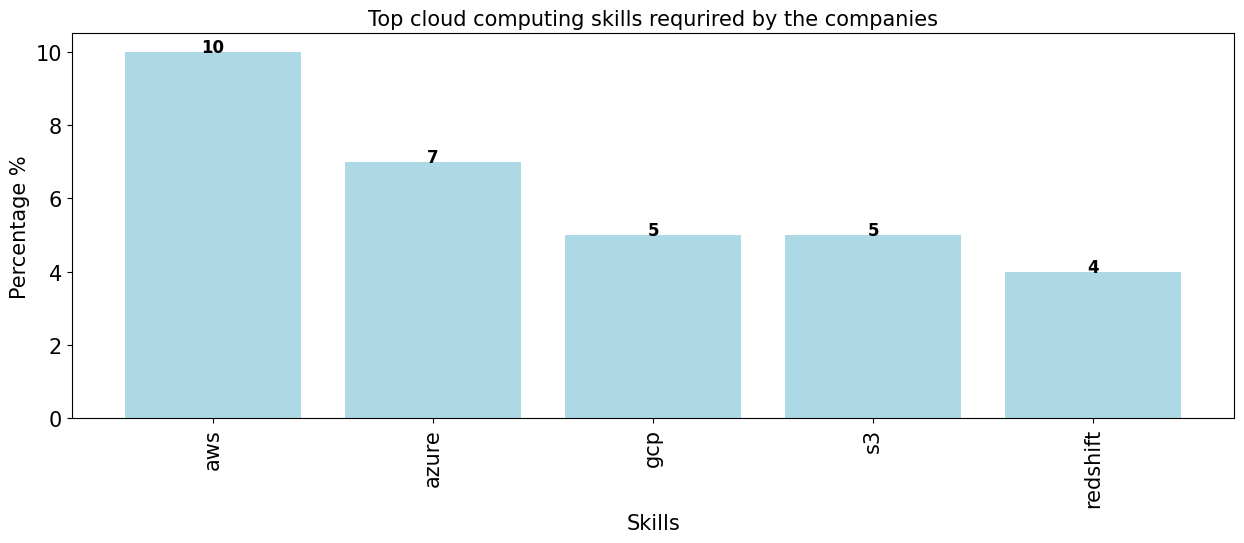

In [ ]:
plt.figure(figsize = (15,5))
x = cloud_df["cloud "]
y = cloud_df["count"]
plt.bar(x,y,color= "lightblue")
plt.title("Top cloud computing skills requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Percentage %",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in cloud_required.items():
    plt.text(k,v+0, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

#### AI Skills

In [ ]:
counter = 0
ds_ml_required = defaultdict()
for item in ds_ml:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    ds_ml_required[item] = counter

ds_ml_df = pd.DataFrame(list(ds_ml_required.items()),columns = ['Data Engineer /Machine Learning Skills ','count'])
ds_ml_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

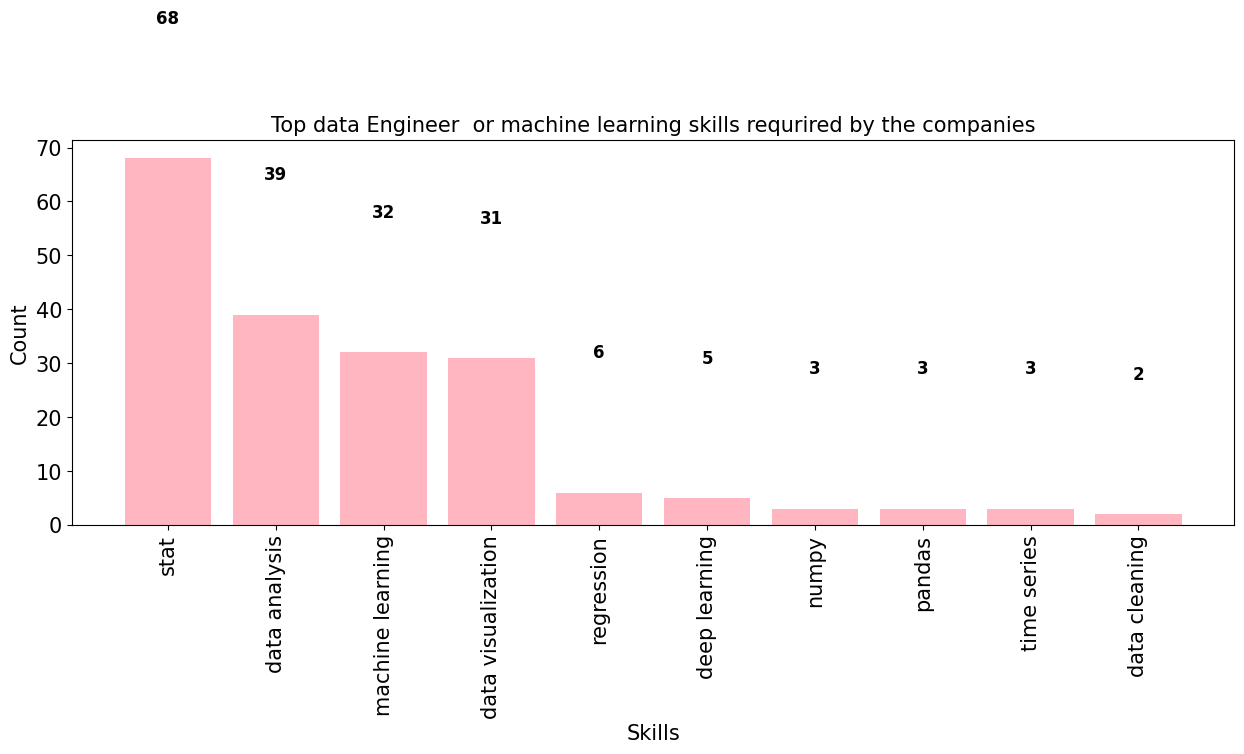

In [ ]:
plt.figure(figsize = (15,5))
x = ds_ml_df["Data Engineer /Machine Learning Skills "]
y = ds_ml_df["count"]
plt.bar(x,y,color= "lightpink")
plt.title("Top data Engineer  or machine learning skills requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

for k,v in ds_ml_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

#### Other Skills

In [ ]:
counter = 0
other_skills_required = defaultdict()
for item in other_skills:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    other_skills_required[item] = counter


other_skills_df = pd.DataFrame(list(other_skills_required.items()),columns = ['Other Skills ','count'])
other_skills_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

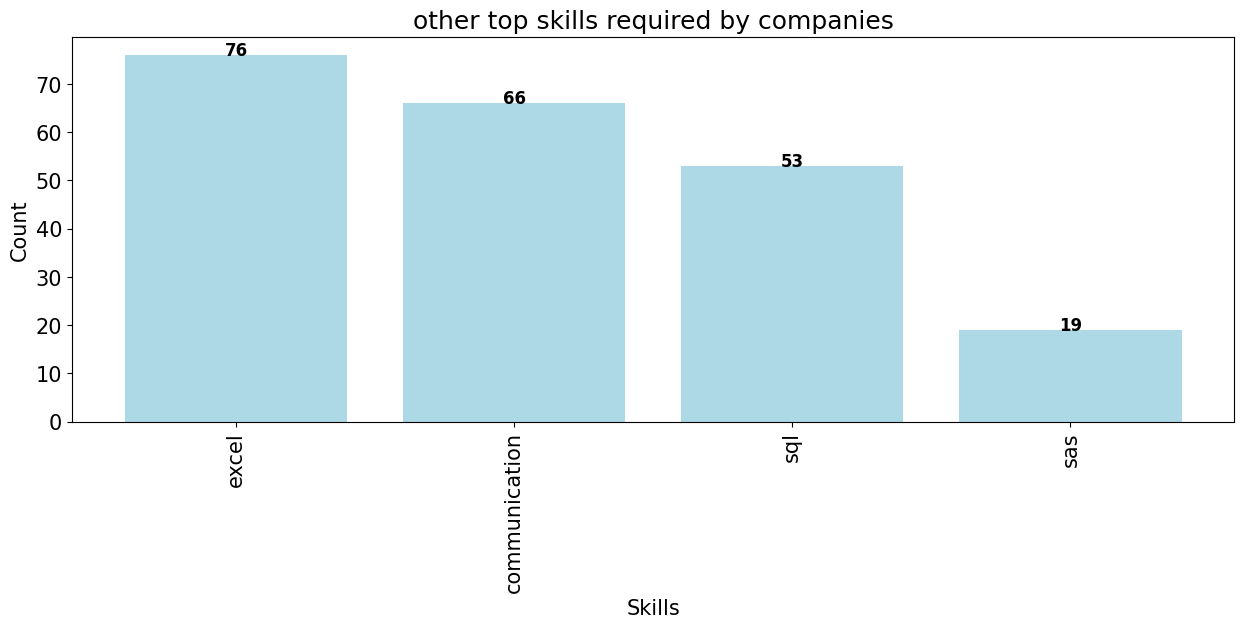

In [ ]:
plt.figure(figsize = (15,5))
plt.title("other top skills required by companies", fontsize=18)
plt.bar(other_skills_df["Other Skills "], other_skills_df["count"],color= "lightblue")
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

for k,v in other_skills_required.items():
    plt.text(k,v+0, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

##  3. Topic modelling ( Used for Data Desc)

### Removing closely worded job descriptions

Before apply topic modelling to the job descriptions in the data set, job adverts that are very similar but not identical need to be removed. I've decided the best way to remove these adverts is to transform to a vector based on their word counts and calculate their cosine similarity scores. Anything that is close to 1 without equalling 1 is very likely to be a repetition of an advert which contains a small difference.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = df['Description']
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(corpus)

#Dataframe with cosine similarties
cos_df = pd.DataFrame(cosine_similarity(X_train_counts))

#Dataframe for job advert and similarity with every other advert
i, j = np.indices(cos_df.shape).reshape(2, -1)
cos_values = cos_df.values.reshape(-1)
cos_sim_df = pd.DataFrame({'i': i, 'j': j, 'sim':cos_values})

#Any advert that has a cosine similarity above 0.98 and doesn't equal itself
cos_rem = cos_sim_df[(cos_sim_df['sim']>0.98)&(i!=j)]

#Method to remove duplicates but keep first instance. Trying to drop duplicates on i and j column wouldn't work as the numbers don't duplicate in those
#columns. Setting another column that combines their values ensure that duplicates can be dropped.

cos_rem['i*j'] = cos_rem['i'] * cos_rem['j']
drop_rows = np.unique(cos_rem.drop_duplicates(subset=['i*j'], keep='first')['i'].values)

#Drop from original dataframe
data_df = data_df[~data_df.index.isin(drop_rows)]
data_df = data_df.reset_index()
data_df.drop(columns={'index'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
len(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



157

Using this method has removed 32 rows that were not identical but had cosine similarity scores of over 0.98.

In [ ]:
corpus = df['Description']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import nltk #google colab
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk


wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

#Function to pre-process the text information

def normalize_document(doc):

    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #re.I (ignore case), re.A (ASCII-only matching)
    doc = doc.lower()
    doc = doc.strip()

    # tokenize document
    tokens = wpt.tokenize(doc)

    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatise document from filtered tokens
    lem_text = [lemmatizer.lemmatize(i) for i in filtered_tokens]

    # Remove words that are only one character.
    lem_text = [token for token in lem_text if len(token) > 1]

    # Remove numbers, but not words that contain numbers.
    lem_text = [token for token in lem_text if not token.isnumeric()]

    doc = ' '.join(lem_text)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora

Gensim requires the words (tokens) to be converted to unique ids, which can be done by creating a dictionary that maps the words to ids.
Once the dictionary has been created a bag of words corpus can be created that contains the word id and the its frequency in each document. It is effectively an equivalent of a Document-Term matrix.

In [ ]:
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora

#Tokenise the corpus
tokenized_corp = [word_tokenize(i) for i in norm_corpus]

# Create Dictionary
id2word = corpora.Dictionary(tokenized_corp)

#Remove words that don't feature 20 times and those that feature in over 50% of documents
id2word.filter_extremes(no_below=20, no_above=0.5)

texts = tokenized_corp

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



To find the optimum number of topics, models will be built for a range of topic sizes and the one with the highest coherence score will be chosen. A previous search into optimum numbers has narrowed down the search to  be between 8 and 15.

In [ ]:
def compute_coherence_values(corpus, dictionary, texts, end, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, end, step):

        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics,
                                               random_state=123,
                                               chunksize=100,
                                               passes=500, #number of passes was investigated. At 500 the coherence score will remain relatively similar
                                               #with any further increase. As the document is quite small this number of passes makes sense.
                                               per_word_topics=True)
        model_list.append(lda_model)

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary = id2word, texts=texts, start=8, end=16, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



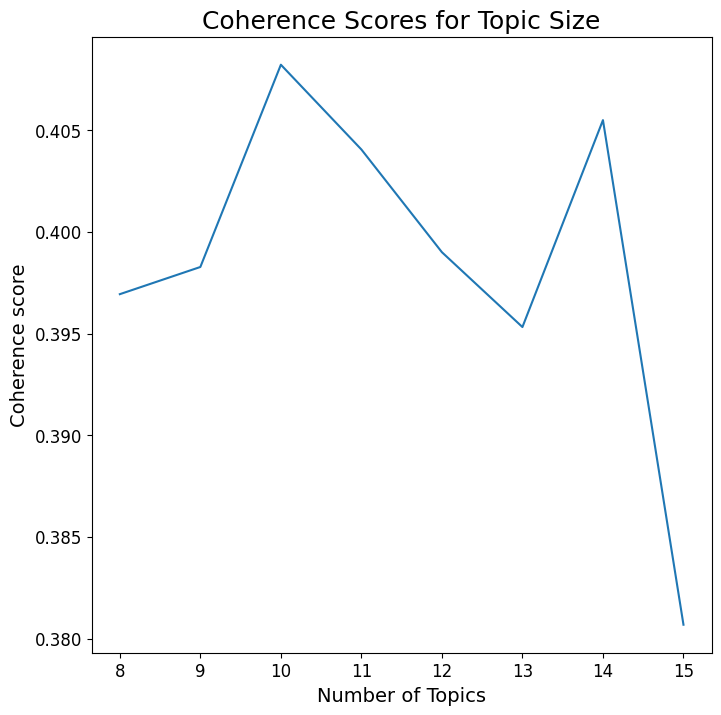

In [ ]:
# Show graph
end=16; start=8; step=1;
x = range(start, end, step)
ax = plt.subplots(figsize=(8,8))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Coherence score", fontsize=14)
plt.title('Coherence Scores for Topic Size', fontsize=18)
plt.show();

10 topics has the highest coherence score and will be chosen to build the final model

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=123,
                                       chunksize=100,
                                       passes=500,
                                       per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Coherence Score:  0.4082193254059394


The top 10 keywords for each topic are as follows.

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]


[(0,
  '0.057*"reporting" + 0.057*"intelligence" + 0.055*"report" + '
  '0.039*"engineering" + 0.036*"project" + 0.035*"development" + '
  '0.034*"operation" + 0.027*"manager" + 0.027*"saudi" + 0.020*"company"'),
 (1,
  '0.037*"bi" + 0.033*"analytics" + 0.033*"power" + 0.032*"intelligence" + '
  '0.030*"visualization" + 0.030*"tool" + 0.028*"consulting" + 0.024*"analyst" '
  '+ 0.024*"analytical" + 0.022*"sql"'),
 (2,
  '0.036*"system" + 0.031*"database" + 0.030*"design" + 0.025*"including" + '
  '0.023*"model" + 0.021*"solution" + 0.018*"knowledge" + 0.017*"information" '
  '+ 0.017*"platform" + 0.017*"technical"'),
 (3,
  '0.045*"product" + 0.020*"customer" + 0.020*"working" + 0.017*"status" + '
  '0.017*"environment" + 0.016*"employee" + 0.015*"role" + 0.015*"different" + '
  '0.015*"detail" + 0.014*"ability"'),
 (4,
  '0.099*"customer" + 0.038*"test" + 0.030*"testing" + 0.028*"solution" + '
  '0.026*"product" + 0.023*"engineering" + 0.022*"tool" + 0.021*"model" + '
  '0.021*"learni

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



There needs to be some human input in terms of naming the topics. For these 9 that is quite straightforward as it's evident in the majority of the topics that the keywords are connected by 1 or 2 terms. Obviously, the topics related to equal opportunities and referral scheme aren't particularly helpful, but this information is included in most adverts. A possible improvement would include words associated with these topics in the stop words.

In [ ]:
lda_dict = {0:'Project management',
            1:'Supporting clients',
            2:'Personal Requirment',
            3:'Data Base',
            4:'Analytics & Statistical Modelling',
            5:'Life cycle Phases',
            6:'Skills Projects',
            7:'Service',
            8:'none',
            9:'Release Requirment',
           '-':'-'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Top 3 topics for each document

In LDA models, each document is composed of multiple topics, although 1 or 2 will be dominant. For this work, the top 3 topics in each document will be highlighted.

In [ ]:
topics_df1 = pd.DataFrame()
topics_df2 = pd.DataFrame()
topics_df3 = pd.DataFrame()

for i, row_list in enumerate(lda_model[corpus]):
    row = row_list[0] if lda_model.per_word_topics else row_list
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if len(row) >= 3:
            if j ==0:
                topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
            elif j ==1:
                topics_df2 = topics_df2.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
            elif j ==2:
                topics_df3 = topics_df3.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
            else:
                break
        elif len(row) == 2:
            if j ==0:
                topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
            elif j ==1:
                topics_df2 = topics_df2.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
                topics_df3 = topics_df3.append(pd.Series(['-', '-']), ignore_index=True)
        elif len(row) == 1:
                topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic]), ignore_index=True)
                topics_df2 = topics_df2.append(pd.Series(['-', '-']), ignore_index=True)
                topics_df3 = topics_df3.append(pd.Series(['-', '-']), ignore_index=True)


topics_df1.rename(columns={0:'1st Topic', 1:'1st Topic Contribution'}, inplace=True)
topics_df2.rename(columns={0:'2nd Topic', 1:'2nd Topic Contribution'}, inplace=True)
topics_df3.rename(columns={0:'3rd Topic', 1:'3rd Topic Contribution'}, inplace=True)

topics_comb = pd.concat([topics_df1, topics_df2, topics_df3],  axis=1, sort=False)

#Join topics dataframe to original data
df = pd.concat([df, topics_comb], axis=1, sort=False)

#Combine the top 3 into one column so it's easier to analyse
df['Top 3 Topics'] = df['1st Topic'].apply(lambda x: lda_dict[x].join(" ,") + " ").astype(str) + df['2nd Topic'].apply(lambda x: lda_dict[x].join(" ,") + " ").astype(str) + \
df['3rd Topic'].apply(lambda x: lda_dict[x]).astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KeyError: ignored

pyLDAVis is the most commonly used and best way to visualise the information contained in a topic model.

In [ ]:
pip install pyLDAvis==2.1.2 # Google Cloab

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                       x                  y  topics  cluster  \
topic                                                          
8      0.042190093971177  0.054611963394190       1        1   
2     -0.077430951131069  0.079354621661891       2        1   
6     -0.212790228215997 -0.174592237436164       3        1   
3     -0.050568434349657  0.045259380317581       4        1   
7      0.099015899851018 -0.006172091635630       5        1   
9      0.213387579912704  0.026412261056674       6        1   
1      0.053285285795038 -0.221868756443465       7        1   
5     -0.097557948751876  0.170801205244161       8        1   
4     -0.134808854129140  0.039625876720058       9        1   
0      0.165277557047802 -0.013432222879296      10        1   

                     Freq  
topic                      
8      20.418390251459424  
2      16.891403492974455  
6      11.081910170173712  
3      10.842709683403736  
7      10.481993766901148  
9       9.343011620735945  
1       7.512548400743084  
5       6.047555827447044  
4       3.708515904306324  
0       3.671960881855123  , topic_info=                Term                 Freq                Total Category  \
205         customer  102.000000000000000  102.000000000000000  Default   
217              job   90.000000000000000   90.000000000000000  Default   
134           client  127.000000000000000  127.000000000000000  Default   
46      intelligence  113.000000000000000  113.000000000000000  Default   
77            report  100.000000000000000  100.000000000000000  Default   
163         learning  112.000000000000000  112.000000000000000  Default   
82           science  136.000000000000000  136.000000000000000  Default   
73           project  135.000000000000000  135.000000000000000  Default   
165          machine   82.000000000000000   82.000000000000000  Default   
122          product  145.000000000000000  145.000000000000000  Default   
75           quality  124.000000000000000  124.000000000000000  Default   
78         reporting   64.000000000000000   64.000000000000000  Default   
183      engineering  109.000000000000000  109.000000000000000  Default   
60             model  137.000000000000000  137.000000000000000  Default   
88           support  125.000000000000000  125.000000000000000  Default   
89            system  162.000000000000000  162.000000000000000  Default   
10                bi   92.000000000000000   92.000000000000000  Default   
221        operation   50.000000000000000   50.000000000000000  Default   
22       development  143.000000000000000  143.000000000000000  Default   
126         solution  165.000000000000000  165.000000000000000  Default   
233          testing   68.000000000000000   68.000000000000000  Default   
4          analytics  146.000000000000000  146.000000000000000  Default   
69             power   73.000000000000000   73.000000000000000  Default   
159       consulting   54.000000000000000   54.000000000000000  Default   
101          analyst   84.000000000000000   84.000000000000000  Default   
160         database  127.000000000000000  127.000000000000000  Default   
258            world   76.000000000000000   76.000000000000000  Default   
93              tool  143.000000000000000  143.000000000000000  Default   
116             join   58.000000000000000   58.000000000000000  Default   
267        scientist   59.000000000000000   59.000000000000000  Default   
145           policy   67.575326365620683   79.834639323026167   Topic1   
72         procedure   29.400414115330758   39.485788162486458   Topic1   
142           manage   32.424902131312528   46.472122605846643   Topic1   
66            office   27.585366431284822   41.939031576732624   Topic1   
210       functional   16.935838489230164   25.990033477446751   Topic1   
108          control   28.507091003194819   43.814360542876848   Topic1   
241        objective   16.644998166016350   25.656431360982829   Topic1   
20